In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [16,4]
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight'] = 'bold'
plt.style.use('seaborn-whitegrid')

In [4]:
# import dataset 

df = pd.read_csv('insurance.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

check for missing values using heatmap

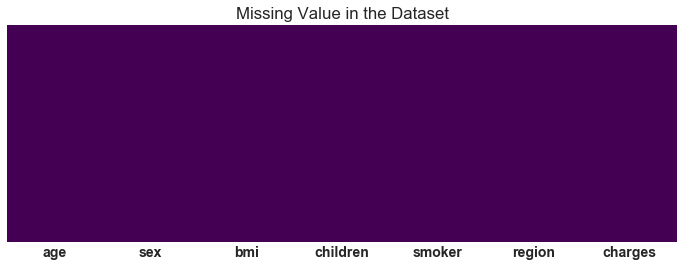

In [16]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Value in the Dataset');

No missing value for this dataset

for our visualization purpose will fit line using seaborn library only for bmi as independent variable and charges as dependent variable


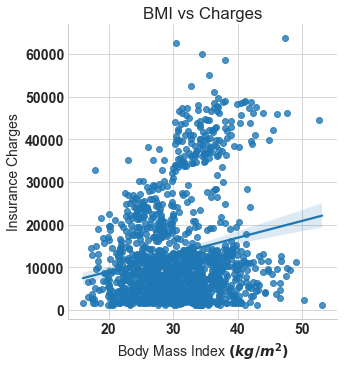

In [14]:
sns.lmplot(x='bmi', y='charges', data=df)
plt.xlabel('Body Mass Index $(kg/m^2)$')
plt.ylabel('Insurance Charges')
plt.title('BMI vs Charges')
plt.show()

## Plots

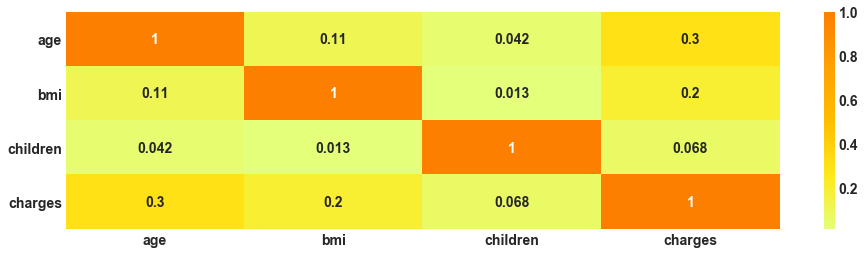

In [20]:
corr = df.corr()
sns.heatmap(data=corr, cmap='Wistia', annot=True);

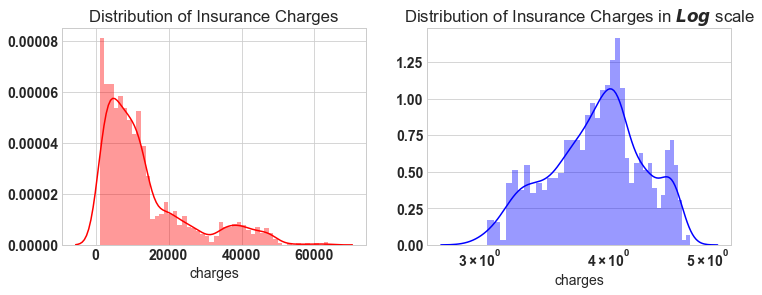

In [23]:
f = plt.figure(figsize=(12,4))

ax = f.add_subplot(121)
sns.distplot(df['charges'], bins=50, color='red', ax=ax)
ax.set_title('Distribution of Insurance Charges')

ax = f.add_subplot(122)
sns.distplot(np.log10(df['charges']), bins=40, color='blue', ax=ax)
ax.set_title('Distribution of Insurance Charges in $Log$ scale')
ax.set_xscale('log')

Based on the plot on the left, we can see that the plot has positive skewness, while the plot on the right tends to normal when applied with natural log.

Hence, we will apply natural log on the dependent variable, 'Charges' for further analysis

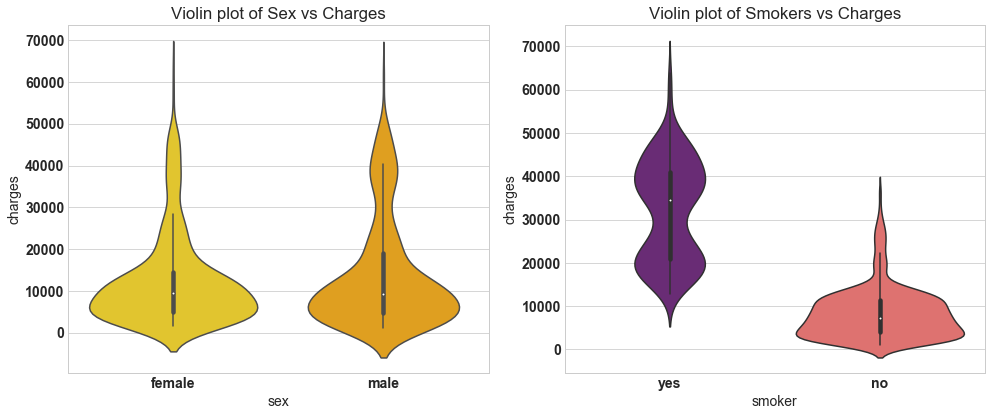

In [27]:
f = plt.figure(figsize=(14,6))

ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges', data=df, palette='Wistia', ax=ax)
ax.set_title('Violin plot of Sex vs Charges')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges', data=df, palette='magma', ax=ax)
ax.set_title('Violin plot of Smokers vs Charges')

plt.tight_layout()
plt.show()

In the left plot, the charges for female and male is about the same. The average charges for both gender is about 5000.

On the right plot, the charges for smokers and non-smokers vary much. The average charges for a non-smoker is about 5000 while the minimum charges for smokers is 5000

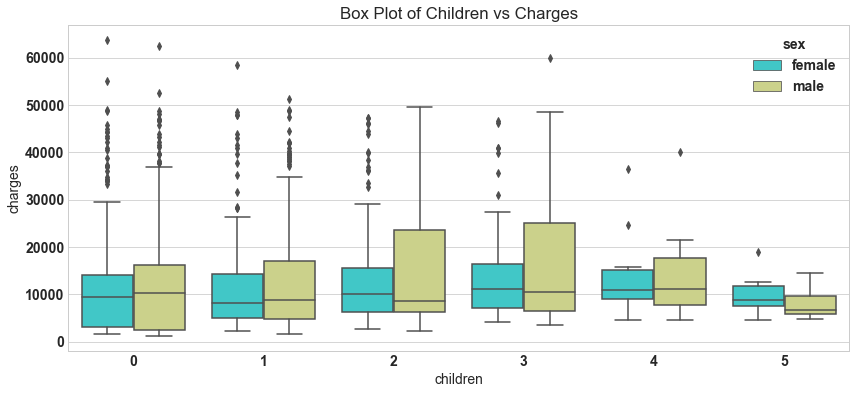

In [29]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges', hue='sex',data=df, palette='rainbow')
plt.title('Box Plot of Children vs Charges');

In [30]:
df.groupby('children').agg(['mean','min','max'])['charges']

,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


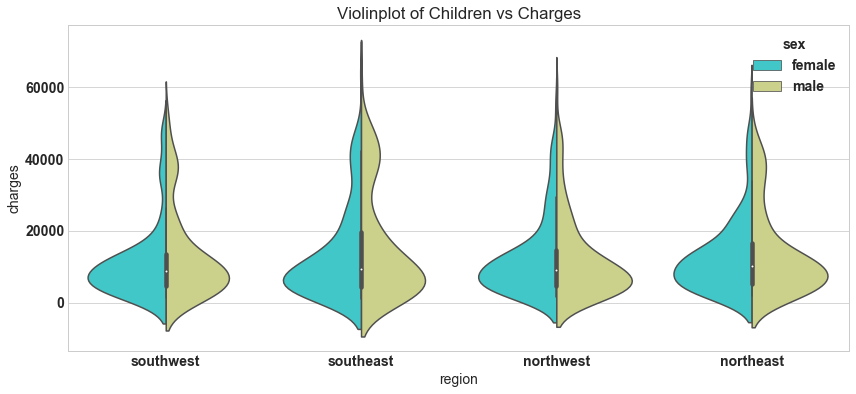

In [33]:
plt.figure(figsize=(14,6))

sns.violinplot(x='region',y='charges', hue='sex',data=df, palette='rainbow', split=True)
plt.title('Violinplot of Children vs Charges');

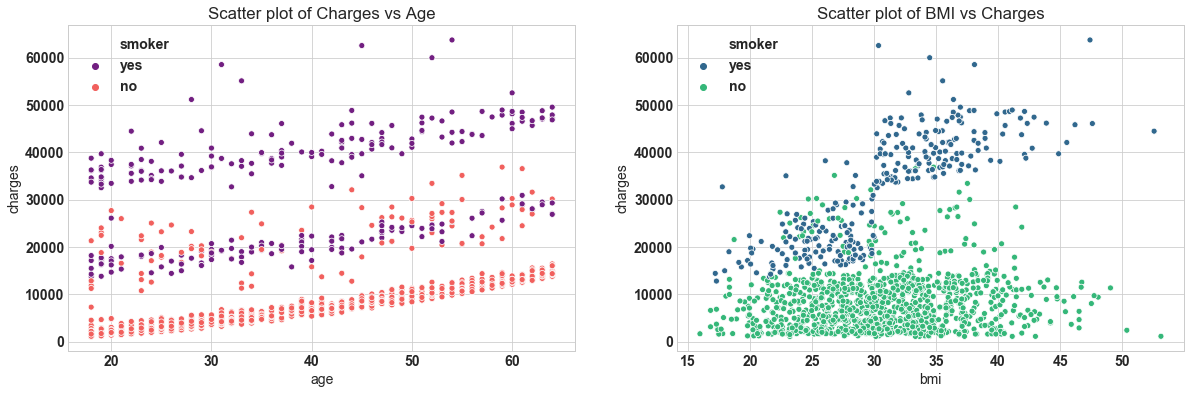

In [36]:
f = plt.figure(figsize=(20,6))

ax = f.add_subplot(121)
sns.scatterplot(x='age', y='charges', data=df, palette='magma', hue='smoker', ax=ax)
ax.set_title('Scatter plot of Charges vs Age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi', y='charges', data=df, palette='viridis', hue='smoker')
ax.set_title('Scatter plot of BMI vs Charges');

## Data Preprocessing

In [37]:
# dummy variable 

categorical_columns = ['sex','children', 'smoker','region']

df_encode = pd.get_dummies(data=df, prefix='OHE', prefix_sep='_', columns=categorical_columns, drop_first=True, dtype='int8')

In [40]:
df_encode.shape, df_encode.head()

((1338, 13),
    age     bmi      charges  OHE_male  OHE_1  OHE_2  OHE_3  OHE_4  OHE_5  \
 0   19  27.900  16884.92400         0      0      0      0      0      0   
 1   18  33.770   1725.55230         1      1      0      0      0      0   
 2   28  33.000   4449.46200         1      0      0      1      0      0   
 3   33  22.705  21984.47061         1      0      0      0      0      0   
 4   32  28.880   3866.85520         1      0      0      0      0      0   
 
    OHE_yes  OHE_northwest  OHE_southeast  OHE_southwest  
 0        1              0              0              1  
 1        0              0              1              0  
 2        0              0              1              0  
 3        0              1              0              0  
 4        0              1              0              0  )

## Box-Cox Transformation

A way to transform non normal dependent variables into a normal shape

In [41]:
from scipy.stats import boxcox

y_bc, lam, ci = boxcox(df_encode['charges'], alpha=0.05)

In [42]:
# log transform 

df_encode['charges'] = np.log(df_encode['charges'])

## Train-Test Split

In [43]:
from sklearn.model_selection import train_test_split

X = df_encode.drop('charges', axis=1)
y = df_encode['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=23)

In [45]:
# step 1 add 0 

X_train_0 = np.c_[np.ones((X_train.shape[0],1)), X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)), X_test]

# step 2 build model 

theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train))

In [46]:
# parameters

parameter = ['theta_' + str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter, 'Columns':columns, 'theta':theta})

In [47]:
parameter_df.head()

,Parameter,Columns,theta
0,theta_0,intersect:x_0=1,7.059171
1,theta_1,age,0.033134
2,theta_2,bmi,0.013517
3,theta_3,OHE_male,-0.067767
4,theta_4,OHE_1,0.149457


In [48]:
# Scikit Learn Module 

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
# parameters for LinearRegression model 

sk_theta = [lin_reg.intercept_] + list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(data=sk_theta, name='SkLearn_theta'))

,Parameter,Columns,theta,SkLearn_theta
0,theta_0,intersect:x_0=1,7.059171,7.059171
1,theta_1,age,0.033134,0.033134
2,theta_2,bmi,0.013517,0.013517
3,theta_3,OHE_male,-0.067767,-0.067767
4,theta_4,OHE_1,0.149457,0.149457


In [50]:
parameter_df

,Parameter,Columns,theta,SkLearn_theta
0,theta_0,intersect:x_0=1,7.059171,7.059171
1,theta_1,age,0.033134,0.033134
2,theta_2,bmi,0.013517,0.013517
3,theta_3,OHE_male,-0.067767,-0.067767
4,theta_4,OHE_1,0.149457,0.149457
5,theta_5,OHE_2,0.272919,0.272919
6,theta_6,OHE_3,0.244095,0.244095
7,theta_7,OHE_4,0.523339,0.523339
8,theta_8,OHE_5,0.466030,0.466030
9,theta_9,OHE_yes,1.550481,1.550481


We have successfully build our model since the parameters gained using the normal equation matches the ones resulted from the sklearn linear regression model.

Next, Prediction and Model Evaluation

In [52]:
# normal equation
y_pred_norm = np.matmul(X_test_0,theta)

# MSE
J_MSE = np.sum((y_pred_norm-y_test)**2) / X_test_0.shape[0]

# R-squared 
SSE = np.sum((y_pred_norm-y_test)**2)
SST = np.sum((y_pred_norm-y_test.mean())**2)

R_squared = 1 - (SSE/SST)

print('The Mean Squared(MSE) or J(theta) of normal equation is : {0}'.format(J_MSE))
print('The R-_squared of normal equation is : {0}'.format(R_squared))

The Mean Squared(MSE) or J(theta) of normal equation is : 0.18729622322981895
The R-_squared of normal equation is : 0.6828200212288025


In [53]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

# MSE
from sklearn.metrics import mean_squared_error
J_MSE_sk = mean_squared_error(y_pred_sk,y_test)

# R-squared 
R_squared_sk = lin_reg.score(X_test,y_test)

print('The Mean Squared(MSE) or J(theta) of sklearn regression module is : {0}'.format(J_MSE_sk))
print('The R-squared of sklearn regression module is : {0}'.format(R_squared_sk))

The Mean Squared(MSE) or J(theta) of sklearn regression module is : 0.18729622322981904
The R-squared of sklearn regression module is : 0.7795687545055316


The model fits our model well. It returns $R^2$ value of 77.95% yet we can still improve on this. Remember that natural logarithm is applied on the dependent variable.

## Model Evaluation

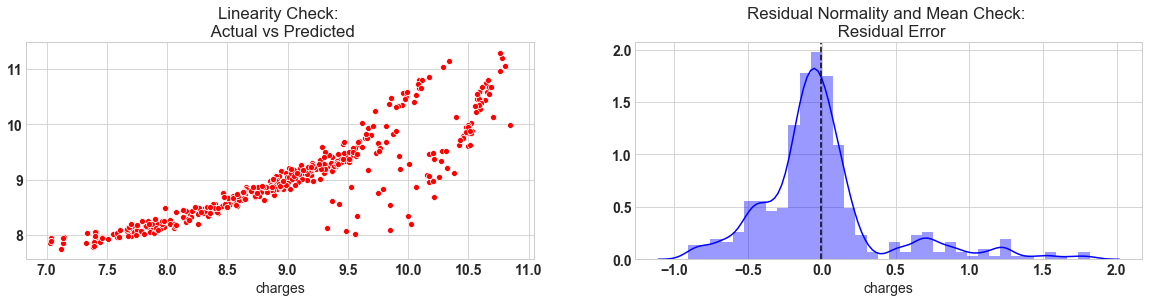

In [58]:
# check for Linearity 
f = plt.figure(figsize=(20,4))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred_sk, color='red', ax=ax)
ax.set_title('Linearity Check: \n Actual vs Predicted');

ax = f.add_subplot(122)
sns.distplot((y_test-y_pred_sk), color='blue', ax=ax)
ax.axvline((y_test-y_pred_sk).mean(),color='k', linestyle='--')
ax.set_title('Residual Normality and Mean Check: \n Residual Error');

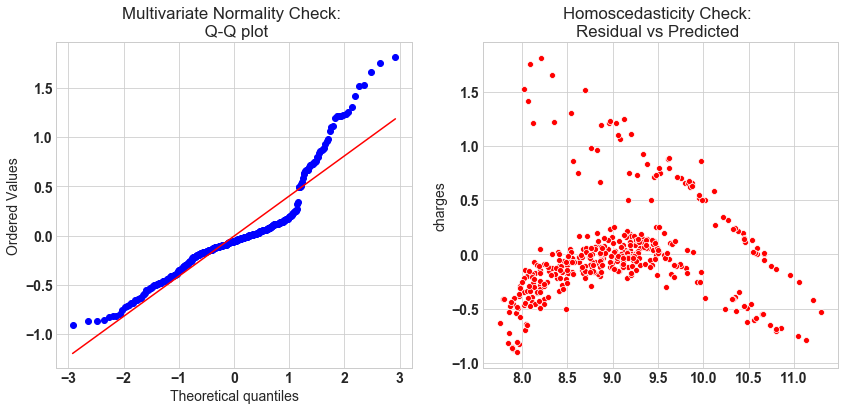

In [61]:
# Check for Multivariate Normality 

f, ax = plt.subplots(1,2,figsize=(14,6))

import scipy as sp

_,(_,_,r) = sp.stats.probplot((y_test-y_pred_sk),fit=True, plot=ax[0])
ax[0].set_title('Multivariate Normality Check: \n Q-Q plot')

sns.scatterplot(y=(y_test-y_pred_sk), x=y_pred_sk, ax=ax[1], color='red')
ax[1].set_title('Homoscedasticity Check: \nResidual vs Predicted ');

In [62]:
# check for Multicollinearity 
# Variance Inflation Factoabsr

VIF = 1/(1-R_squared_sk)
VIF

4.536561945911133

The model assumption linear regression as follows

    -In our model the actual vs predicted plot is curve so linear assumption fails
    -The residual mean is zero and residual error plot right skewed
    -Q-Q plot shows as value log value greater than 1.5 trends to increase
    -The plot is exhibit heteroscedastic, error will insease after certian point.
    -Variance inflation factor value is less than 5, so no multicollearity.